<b>Dans ce notebook on réalise l'analyse exploratoire du dataset.</b>

# Table of contents
1. [Load clean dataset](#load)
2. [Analyses univariées](#def_features)
3. [Analyses univariées](#univariate)
4. [Analyses bivariées](#bivariate)
5. [Analyses multivariées](#multivariate)

    5.1 [Analyse descriptive](#desc)
    
    5.2 [Analyse explicative](#expl)
6. [Simulation d'application](#application) 


<b style="background-color:tomato;font-size:14px;">1. LOAD CLEAN DATASET<b>
    <a id="load"></a> 

In [1]:
import numpy as np 
import pandas as pd
pd.options.mode.chained_assignment = None
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.collections import LineCollection
import matplotlib.font_manager

from sklearn import decomposition
from sklearn import preprocessing

from scipy.cluster.hierarchy import dendrogram


try:
    del data
except:
    dummy=1

#On reprend le dataset issu du clean
#data=pd.read_csv('../dataset/en.openfoodfacts.org.products.csv',sep='\t',nrows=300000, low_memory=False)
data=pd.read_csv('../dataset/consolidated-167273.csv',sep='\t',nrows=300000, low_memory=False)

<b style="background-color:tomato;font-size:14px;">2. DEFINITION DES FEATURES DE SCORING<b>
    <a id="def_features"></a> 

Compte tenu des éléments de définition et de description fournis pour établir le score nutritionnel on propose de définir les features de scoring :

In [2]:
scoring_features = ['energy-kcal_100g',
 'saturated-fat_100g',
'salt_100g',
'sugars_100g',
'fiber_100g',
'proteins_100g',
'fruits-vegetables-nuts_100g']
scoring_features

['energy-kcal_100g',
 'saturated-fat_100g',
 'salt_100g',
 'sugars_100g',
 'fiber_100g',
 'proteins_100g',
 'fruits-vegetables-nuts_100g']

<b style="background-color:tomato;font-size:14px;">3. ANALYSES UNIVARIEES<b>
    <a id="univariate"></a> 

<b style="background-color:tomato;font-size:12px;">3.1 Valeurs synthétiques<b>
    <a id="univariate_mean"></a> 

In [3]:
from tabulate import tabulate

details=[]
details.append(['Feature','mean','std','Item remarquable','Max'])
for i in scoring_features:
    mean = round(data[i].mean(),3)
    std = round(data[i].std(),3)
    max_value = round(data[i].max(),0)
    worse = data.loc[data[i] == max_value]
    try:
        details.append([i,mean,std,worse['product_name'].iloc[0],max_value])
    except:
        details.append([i,mean,std,'???',max_value])
print(tabulate(details)) 

---------------------------  ------  -------  -------------------------------------  ------
Feature                      mean    std      Item remarquable                       Max
energy-kcal_100g             262.15  181.218  Reformulated Brownie                   2110.0
saturated-fat_100g           5.817   8.141    aceite de coco                         88.0
salt_100g                    0.991   1.429    Arachides grillees a sec               42.0
sugars_100g                  10.931  18.258   Gatorade                               144.0
fiber_100g                   2.499   3.472    Cereza con zumo de endrina             50.0
proteins_100g                9.93    8.895    skyr                                   110.0
fruits-vegetables-nuts_100g  36.249  34.174   Pistaches grillées sans sel Wonderful  100.0
---------------------------  ------  -------  -------------------------------------  ------


<b style="background-color:tomato;font-size:12px;">3.2 Représentation des quantiles<b>
    <a id="univariate_quantiles"></a> 

<Figure size 1440x360 with 0 Axes>

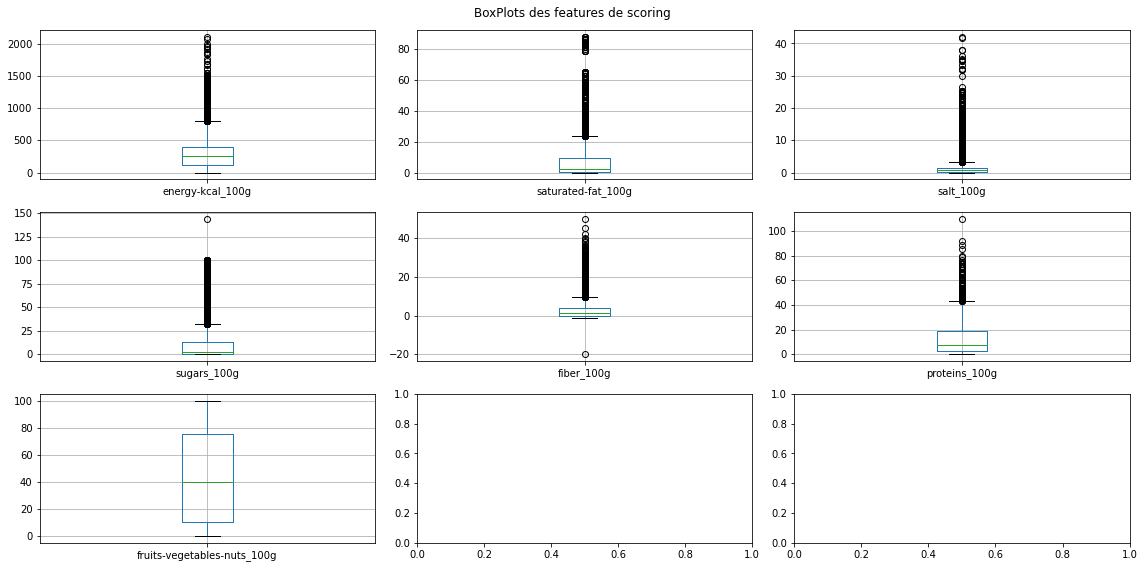

In [6]:
plt.figure(figsize=(20,5))

fig, axes = plt.subplots(3,3, figsize=(16,8))

plt.suptitle("BoxPlots des features de scoring")
for i, ax in zip(range(7), axes.flat):
    data.boxplot(column=[scoring_features[i]], ax=axes.flatten()[i])
    
plt.tight_layout()    

plt.show() 



<b style="background-color:tomato;font-size:12px;">3.3 Analyse<b>
    <a id="univariate_analysis"></a> 

############### Analyse

<b style="background-color:tomato;font-size:14px;">4. ANALYSES BIVARIEES<b>
    <a id="bivariate"></a> 

<b style="background-color:tomato;font-size:12px;">4.1 Matrice de correlation<b>
    <a id="correlation_matrix"></a> 

On cherche à détecter les relations linéaires qui peuvent exister entre les variables du dataset. On retient donc pour cela la représentation de la matrice de correlation du coefficient de relation linéaire de Pearson.

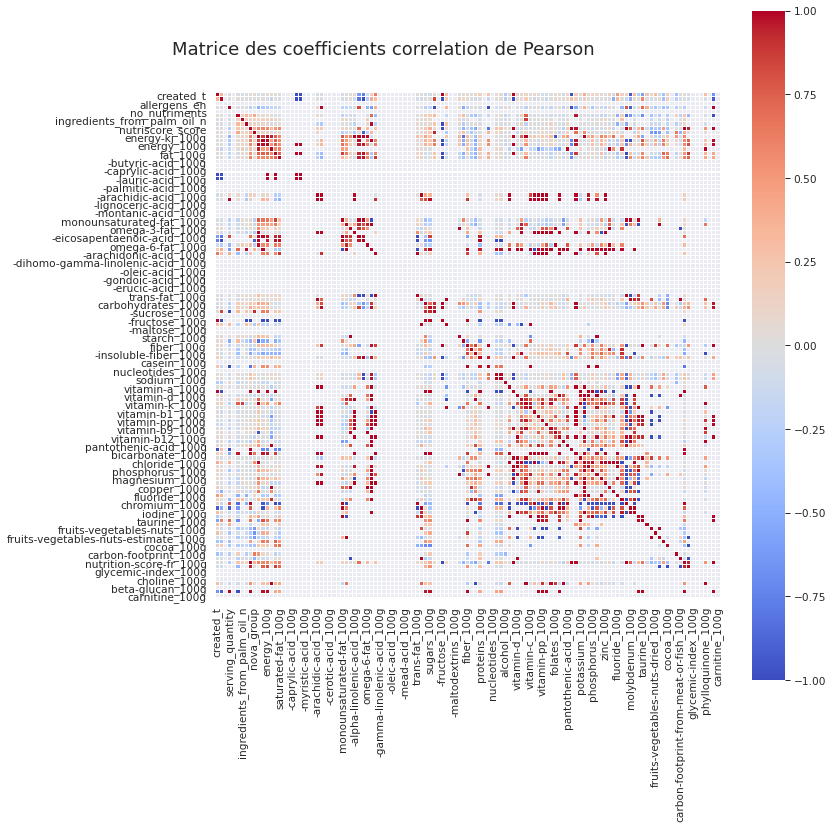

In [6]:
sns.set(context="paper", font_scale = 1.2)
corrmat = data.corr()
f, ax = plt.subplots(figsize=(12, 12))
f.text(0.45, 0.93, "Matrice des coefficients correlation de Pearson", ha='center', fontsize = 18)
sns.heatmap(corrmat, square=True, linewidths=0.01, cmap="coolwarm")
plt.tight_layout()

<b style="background-color:tomato;font-size:12px;">4.2 Zooms <b>
    <a id="zoom"></a> 

In [7]:
def plotCorrelationMatrix(feature,title):
    sns.set(context="paper", font_scale = 1.2)
    f, ax = plt.subplots(figsize=(11, 11))
    cols = corrmat.nlargest(25, feature)[feature].index
    cm = corrmat.loc[cols, cols] 
    hm = sns.heatmap(cm, cbar=True, annot=True, square=True,
                     fmt='.2f', annot_kws={'size': 9}, linewidth = 0.1, cmap = 'coolwarm',
                     yticklabels=cols.values, xticklabels=cols.values)
    f.text(0.5, 0.93, title, ha='center', fontsize = 18)
    plt.show()

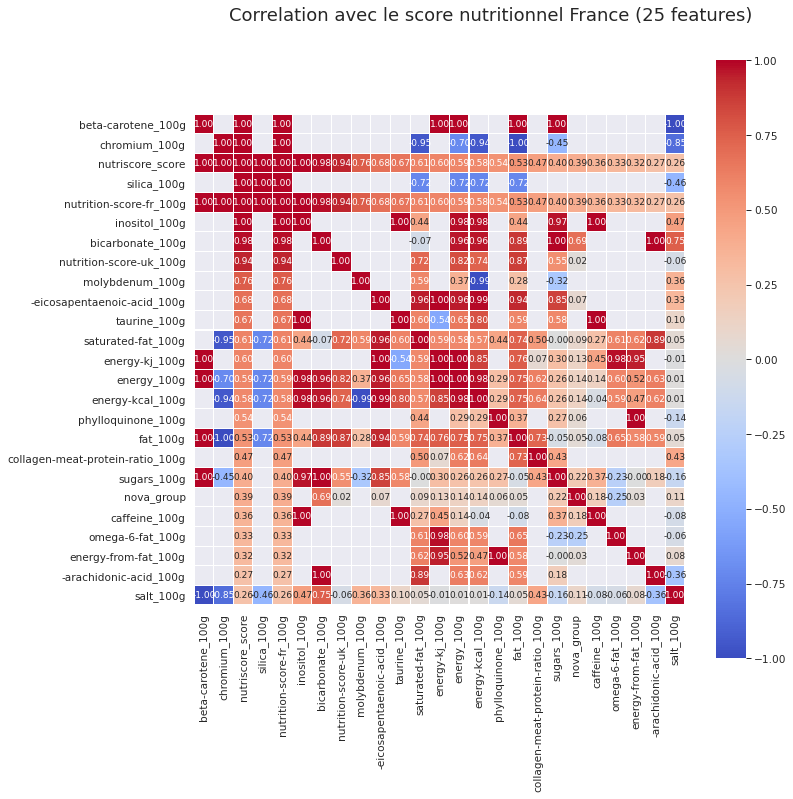

In [8]:
plotCorrelationMatrix('nutrition-score-fr_100g','Correlation avec le score nutritionnel France (25 features)')

<Figure size 1440x360 with 0 Axes>

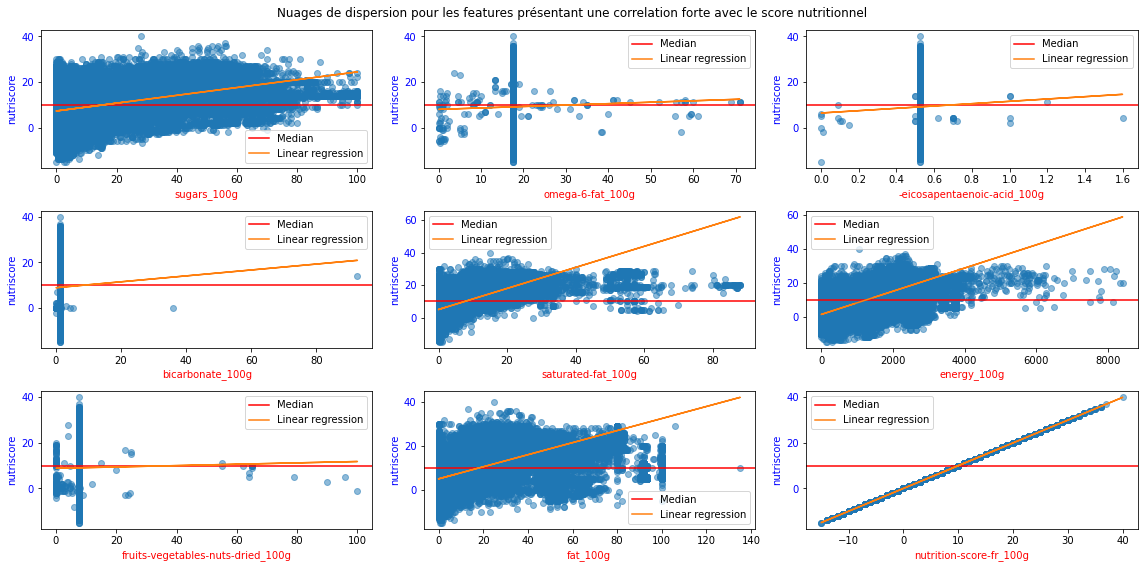

In [4]:

pd.options.mode.chained_assignment = None
features = ["sugars_100g","omega-6-fat_100g","-eicosapentaenoic-acid_100g","bicarbonate_100g","saturated-fat_100g",
               "energy_100g","fruits-vegetables-nuts-dried_100g","fat_100g","nutrition-score-fr_100g"]

nutriscores = data[data.nutriscore_score.notnull()]
median = nutriscores["nutriscore_score"].median()

plt.figure(figsize=(20,5))

fig, axes = plt.subplots(3,3, figsize=(16,8))

plt.suptitle("Nuages de dispersion pour les features présentant une correlation forte avec le score nutritionnel")
for i, ax in zip(range(9), axes.flat):
    ax.set_xlabel(features[i], color="red")
    ax.set_ylabel('nutriscore', color='blue')

    feature_mean = nutriscores[features[i]].mean()
    subset=nutriscores[features[i]]
    subset.fillna(feature_mean, inplace = True)    
    
    ax.plot(nutriscores[features[i]],nutriscores["nutriscore_score"], 'o',alpha=0.5)
    ax.tick_params(axis='y', labelcolor="blue")
    
    ax.axhline(y=median, color='r', linestyle='-', label='Median')

    x = nutriscores[features[i]].to_numpy(dtype=object).astype(str).astype(float)
    y = nutriscores['nutriscore_score'].to_numpy(dtype=object).astype(str).astype(float)

    m, b = np.polyfit(x, y, 1)
    ax.plot(subset, m*subset + b, label='Linear regression')
    ax.legend()

plt.tight_layout()    

plt.show() 


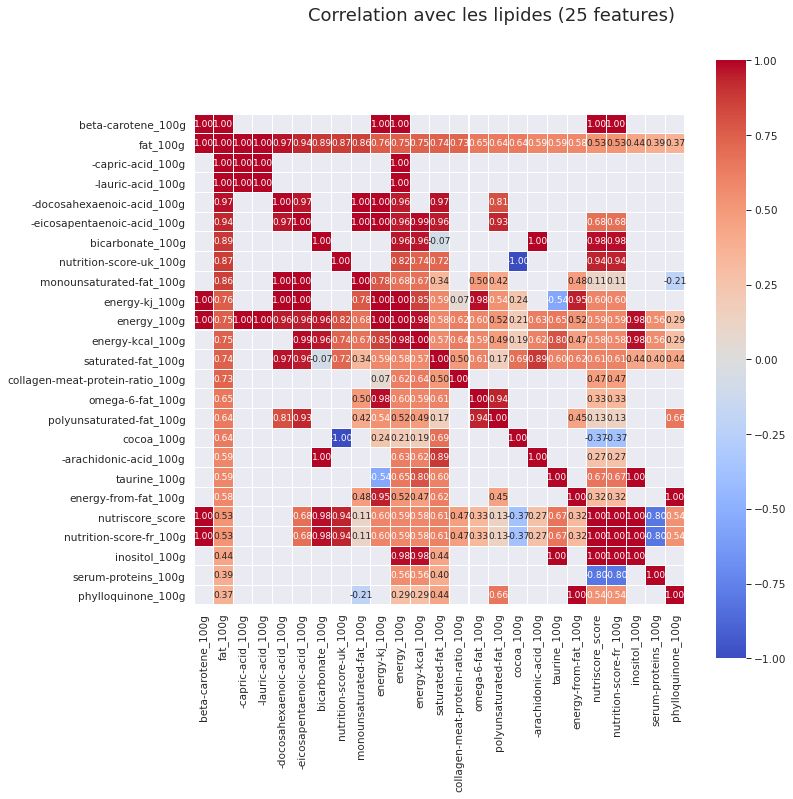

In [10]:
plotCorrelationMatrix('fat_100g','Correlation avec les lipides (25 features)')

<b style="background-color:tomato;font-size:12px;">4.3 Analyse du score nutritionnel par catégories de produit <b>
    <a id="eval_nutri_categ"></a> 

In [11]:
data['pnns_groups_3'].unique()

array(['Dressings and sauces', 'One-dish meals', 'Biscuits and cakes',
       'Fruits', 'Meat', 'Sweetened beverages', 'Cheese', 'Bread',
       'Fish and seafood', 'Sweets', 'Salty and fatty products',
       'Fruit juices', 'Dried fruits', 'Fats', 'Vegetables',
       'Dairy desserts', 'pastries', 'Pizza pies and quiches',
       'Unsweetened beverages', 'Nuts', 'Cereals', 'Alcoholic beverages',
       'Breakfast cereals', 'Appetizers', 'Processed meat',
       'Chocolate products', 'Sandwiches', 'Ice cream', 'Eggs',
       'Milk and yogurt', 'Teas and herbal teas and coffees', 'Soups',
       'Potatoes', 'Waters and flavored waters',
       'Plant-based milk substitutes', 'Offals', 'legumes'], dtype=object)

In [12]:
categ_prod = [] ; label_prod = []
for i,s in enumerate(data['pnns_groups_1'].unique()):
    if isinstance(s, float): continue
    if s == 'unknown': continue    
    produit = str(s)
    df1 = data[data['pnns_groups_1'] == produit]
    table_1 = pd.Series(df1[pd.notnull(df1['nutrition-score-fr_100g'])]['nutrition-score-fr_100g'])
    categ_prod.append(table_1)
    label_prod.append(s)

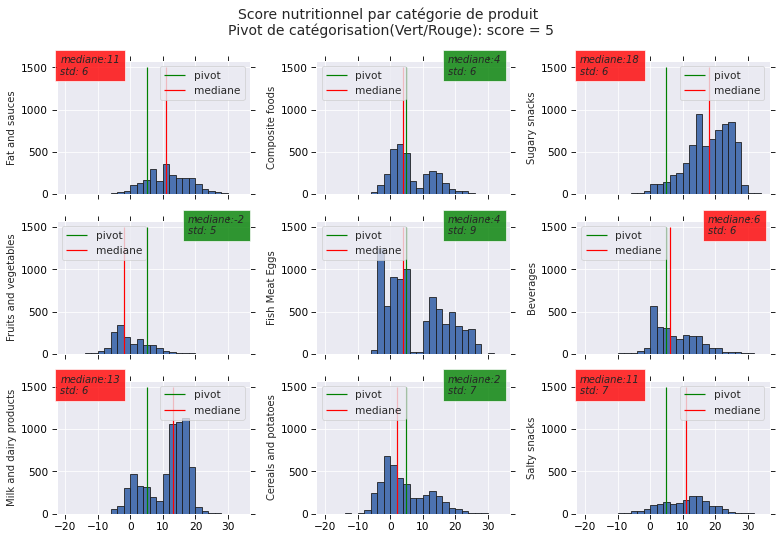

In [18]:
tPlot, axes = plt.subplots(nrows=3, ncols=3, sharex=True, sharey=False, figsize=(11,7))
axes = np.array(axes)

i=0
for ax in axes.reshape(-1):
    t = categ_prod[i].value_counts(sort=True)
    t.sort_index(inplace=True)
    hist = list(t)
    bins = list(t.index)
    
    ax.tick_params(labelcolor='black', top='off', bottom='on', left='on', right='off')
    ax.set_ylabel(label_prod[i], fontsize = 10)
    ax.hist(categ_prod[i], bins=range(-20,36,2), edgecolor = 'k')
    ax.vlines(x=5,ymin=0,ymax=1500,color='green',label='pivot')

    mediane = int(categ_prod[i].median())
    std = int(categ_prod[i].std())
    #skewness = round(categ_prod[i].skew(),3)
    #kurtosis = round(categ_prod[i].kurtosis(),3)

    ax.vlines(x=mediane,ymin=0,ymax=1500,color='red',label="mediane")
    
    
    color = 'green' if mediane <= 5 else 'red'

    if mediane < 11:
        #ax.text(0.68, 0.9, 'mediane:' + str(mediane) + '\nskewness: ' + str(skewness) + '\nkurtosis: ' + str(kurtosis), style='italic',
        ax.text(0.68, 0.9, 'mediane:' + str(mediane) + '\nstd: ' + str(std), style='italic',
        #ax.text(0.68, 0.9, 'mediane:{}'.format(int(categ_prod[i].median())), style='italic',
        transform=ax.transAxes, fontsize = 10,
                bbox={'facecolor':color, 'alpha':0.8, 'pad':5})
        ax.legend(loc="upper left")
    else:
        #ax.text(0.02, 0.9, 'mediane:' + str(mediane) + '\nskewness: ' + str(skewness) + '\nkurtosis: ' + str(kurtosis), style='italic',
        ax.text(0.02, 0.9, 'mediane:' + str(mediane) + '\nstd: ' + str(std), style='italic',
        #ax.text(0.02, 0.9, 'mediane:{}'.format(int(categ_prod[i].median())), style='italic',
        transform=ax.transAxes, fontsize = 10,
                bbox={'facecolor':'red', 'alpha':0.8, 'pad':5})
        ax.legend(loc="upper right")
           
    i += 1

tPlot.text(0.5, 1.01, 'Score nutritionnel par catégorie de produit \nPivot de catégorisation(Vert/Rouge): score = 5', ha='center', fontsize = 14)
plt.tight_layout()

<p>La représentation de formes du score nutritionnel des catégories générales montre déjà des variations de formes intéressantes à analyser.</p>
<p>Le tableau ci-dessous détaille l'analyse pour chaque catégorie.</p>
<p>A noter qu'ici on ne prend pas en considération les indicateurs de skewness et kurtosis du fait d'une part que les données ne constituent pas une distribution normale, d'autre part parce que la limite de forme est fixe (score = 5). On peut toutefois commenter la forme par rapport à cette limite.</p>
<table>
    <tr>
        <td bgcolor="blue">Catégorie</td>
        <td bgcolor="blue">Médiane</td>   
        <td bgcolor="blue">Description de la distribution (médiane/std)</td>            
        <td bgcolor="blue">Description de forme par rapport à la valeur pivot</td>   
        <td bgcolor="blue">Queue gauche</td>   
        <td bgcolor="blue">Queue droite</td>           
        <td bgcolor="blue">Commentaires de forme</td>   
        <td bgcolor="blue">Conclusions</td>
    </tr>
    <tr>
        <td>Fats and sauces</td>
        <td>11</td>
        <td>Forme continue et homogène de part et d'autre : cette catégorie couvre une plage de valeurs de score nutritionnel importante essentiellement dans des valeurs élevées (ie mauvais score)</td>
        <td>Forme asymétrique décentrée sur la droite</td>
        <td>Décroissement fort</td>
        <td>Etalement continu</td>
        <td>Les produits de cette catégorie présentent majoritairement un mauvais score nutritionnel, avec pour certains des valeurs très mauvaises. Il peut arriver que d'autres n'aient pas un mauvais score, cela traduit certainement des variations de qualité dans l'appellation "Matières grasses"</td>
        <td>Dans l'optique d'obtenir un repas ayant un bon score nutritionnel il est préférable de limiter voire d'éviter les produits de cette catégorie</td>
    </tr>
    <tr>
        <td>Composite foods</td>
        <td>5</td>
        <td>La médiane est confondue avec le pivot. La distribution présente un groupe recentré à gauche ce qui indique que certains produits de la catégorie ont de bons scores. Par contre à droite la distribution est plus étalée ce qui est corroboré par la valeur d'écart type qui est importante. Les produits de cette partie de la distribution peuvent même avoir de très mauvais score.</td>
        <td>Forme pseudo symétrique</td>
        <td>Décroissement fort</td>
        <td>Etalement quasi continu</td>
        <td>Cette catégorie présente de façon égale une part de produits ayant un bon score nutritionnel, tout comme un mauvais.</td>
        <td>En théorie il ne serait pas nécessairement déconseillé d'intégrer les produits de cette catégorie dans un repas, mais il faut être vigilant sur leur composition pour s'assurer de leur impact sur la qualité nutritionnelle du repas</td>
    </tr>
    <tr>
        <td>Sugary snacks</td>
        <td>18</td>
        <td>La forme de la distribution par rapport à la médiane est un peu complexe. La partie à gauche présente une valeur exceptionnelle. Hormis celle-ci la partie gauche est de forme décroissante ce qui indique qu'on retrouvera peu de produits avec un bon score nutritionnel. La partie droite est concentrée et homogène, ce qui montre que la majeure partie des produits de la catégorie présente un mauvais score nutritionnel. </td>
        <td>Forme asymétrique excentrée à droite</td>
        <td>Queue gauche quasi inexistante</td>        
        <td>Queue droite très concentrée puis étalée jusqu'aux valeurs élevées de score nutritionnel</td>
        <td>Très clairement les produits de cette catégorie ont un très mauvais score nutritionnel. A noter toutefois la présence marginal de certains produits pouvant avoir un bon score</td>
        <td>On peut aisément conclure que les produits de cette catégorie sont absolument à éviter dans le cadre d'un repas où l'on vise d'avoir un bon score nutritionnel </td>
    </tr>
    <tr>
        <td>Fruits and vegetables</td>
        <td>-4</td>
        <td>La distribution est très recentrée sur la valeur médiane, avec toutefois une queue droite qui s'étale légèrement, tout en restant sous la valeur pivot. Clairement les produits de cette catégorie présentent un excellent score nutritionnel. </td>
        <td>Excentrée à gauche</td>
        <td>Très recentrée sur la valeur médiane</td>        
        <td>Quasi inexistante</td>
        <td>On peut considérer que tous les produits de la catégorie ont un bon score nutritionnel</td>
        <td>Les produits de cette catégorie peuvent être intégrés dans un repas sans craindre de faire chuter le score nutritionnel global. </td>
    </tr>
    <tr>
        <td>Fish Meat Eggs</td>
        <td>5</td>
        <td>La médiane est confondu avec la valeur pivot. Cependant l'écart type nous alerte déjà sur le fait que la distribution n'est pas homogène. On le constate avec sa forme qui est scindée bien distinctement. La partie gauche est bien regroupée sur une plage courte de valeurs de score nutritionnels ce qui signifie que les produits dans cette partie de la distribution sont nutritionnellement bons. A contrario la partie droite présente une rupture avec une forme étalée et homogène, qui montre un saut dans les valeurs de score nutritionnel élevées. Cela indique probablement une disparité de nature de produit</td>
        <td>Forme complexe présentant une rupture</td>
        <td>Homogène</td>        
        <td>Rupture puis étalement homogène</td>
        <td>La catégorie n'est pas homogène. Dans la même catégorie on retrouve des produits dont le score nutritionnel est soit très bon soit mauvais. </td>
        <td>Cette catégorie montre qu'il faudrait affiner la granularité d'analyse. En l'état il est difficile d'apporter une conclusion. C'est un pallier dans notre analyse, nous affinerons au point suivant</td>
    </tr>
    <tr>
        <td>Beverages</td>
        <td>11</td>
        <td>Forme plutôt uniformément étalée symétriquement par rapport à la médiane. Les deux queues couvrent des plages de valeurs assez larges. L'écart type étant assez élevé, on peut penser que cette catégorie englobe un ensemble assez disparate de produits </td>
        <td>Forme aplatie évasée couvrant une large plage de valeurs de score nutritionnel</td>
        <td>Courte avec une valeur exceptionnelle</td>
        <td>Homogène très étalée</td>  
        <td>La catégorie couvre des produits qui présentent des valeurs très disparates. Certains ont de bons score, mais on retrouve à l'opposé d'autres qui ont de mauvaises performances</td>
        <td>Là encore nous pouvons conclure que la granularité d'analyse n'est pas suffisante pour établir un conseil autour des produits de cette catégorie.</td>
    </tr>
    <tr>
        <td>Milk and dairy products</td>
        <td>13</td>
        <td>La forme générale de la distribution montre qu'il y a deux ensembles de produits avec une rupture dans les valeurs de score nutritionnel. Le groupement à gauche présente une densification à partir d'une valeur beaucoup plus basse que la médiane, tandis que le groupement à droite est continu et homogène dans les valeurs élevées. Ce constat est corroboré par la valeur d'écart type qui est élevée</td>
        <td>Forme complexe avec deux groupements distincts</td>
        <td>N/A</td>        
        <td>N/A</td>
        <td>Les produits de la catégorie ne présentent pas tous les mêmes caractéristiques nutritionnelles. Il s'agit d'un ensemble non homogène pour lequel il est difficile de tirer des généralités sur ses qualités nutritionnelles.</td>
        <td>A nouveau nous devons affiner la granularité d'analyse.</td>
    </tr>
    <tr>
        <td>Cereals and potatoes</td>
        <td>0</td>
        <td>La forme est asymétrique avec une queue droite progressivement dégressive vers des valeurs élevées. </td>
        <td>La forme est asymétrique avec une répartition élevé de la distribution à gauche de la valeur pivot.</td>
        <td>Homogène avec une valeur élevée</td>        
        <td>Etalée progressivement dégressive</td>
        <td>La médiane étant très inférieure à la valeur pivot on peut comprendre que l'essentiel de ces produits présente de bons à très bons scores. Mais parmi les produits de la catégorie on en retrouve qui présentent de mauvais score, ce qui tend à montrer qu'il est impossible de généraliser a priori sur ces produits en partant uniquement de leur catégorie.</td>
        <td>De nouveau la granularité d'analyse n'est pas suffisante pour établir des recommandations sur cette catégorie.</td>
    </tr>
    <tr>
        <td>Salty snacks</td>
        <td>9</td>
        <td>Forme étalée aplatie, équi-répartie de part et d'autre de la valeur médiane. L'écart type étant proportionnellement élevé on a une distribution peu homogène en termes de score nutritionnel </td>
        <td>Forme légèrement asymétrique</td>
        <td>Aplatie légèrement dégressive</td>        
        <td>Aplatie légèrement dégressive</td>
        <td>Cette catégorie regroupe peu de produits par rapport aux autres. Sa distribution en termes de score nutritionnel étant disparate, il semble difficile d'apporter des recommandations générales à leur sujet.</td>
        <td>Il est probable que d'affiner la granularité de l'analyse permettra de mieux classifier ces produits pour établir de meilleurs recommandations nutritionnelles </td>
    </tr>
</table>
<br>
<p>Globalement il ressort de cette première analyse qu'il est nécessaire d'affiner la granularité si on veut pouvoir montrer la pertinence d'incorporer une alternative à un produit ou ingrédient donné dans un menu.</p>

<b style="background-color:tomato;font-size:12px;">4.3 Analyse des features de scoring par sous groupes <b>
    <a id="feature_scoring"></a> 

<b style="background-color:tomato;font-size:10px;">4.3.1 Energie <b>
    <a id="feature_scoring_energy"></a> 

<AxesSubplot:title={'center':'energy-kcal_100g'}, xlabel='pnns_groups_3'>

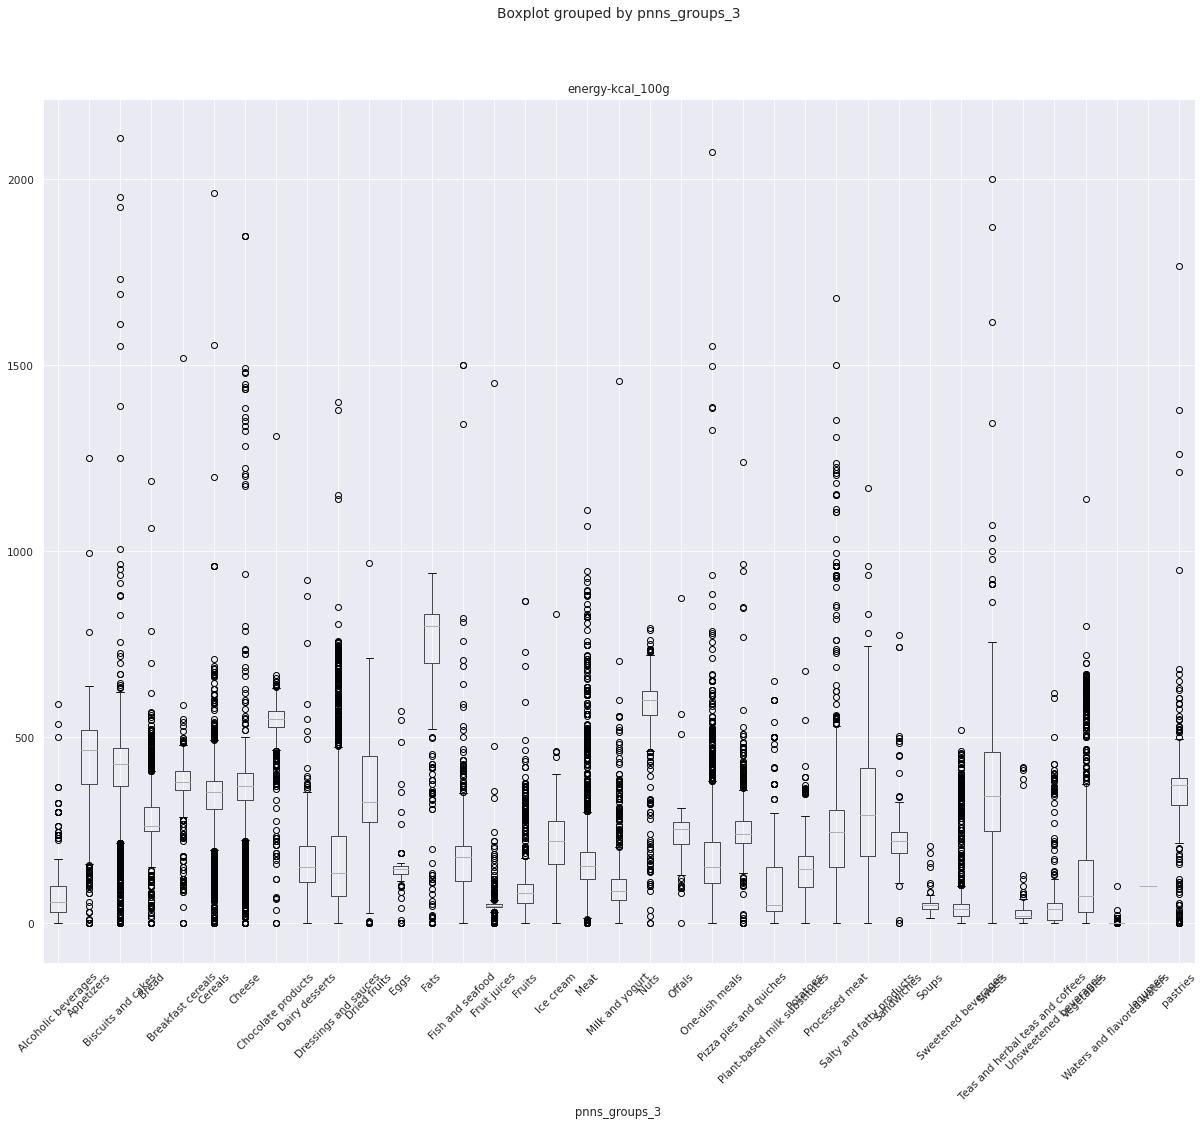

In [20]:
fig, ax = plt.subplots(figsize=(20,16))
plt.suptitle('')
data.boxplot(column=['energy-kcal_100g'], by='pnns_groups_3', ax=ax,rot=45)

<b style="background-color:tomato;font-size:10px;">4.3.2 Sucre <b>
    <a id="feature_scoring_sugar"></a> 

<AxesSubplot:title={'center':'sugars_100g'}, xlabel='pnns_groups_3'>

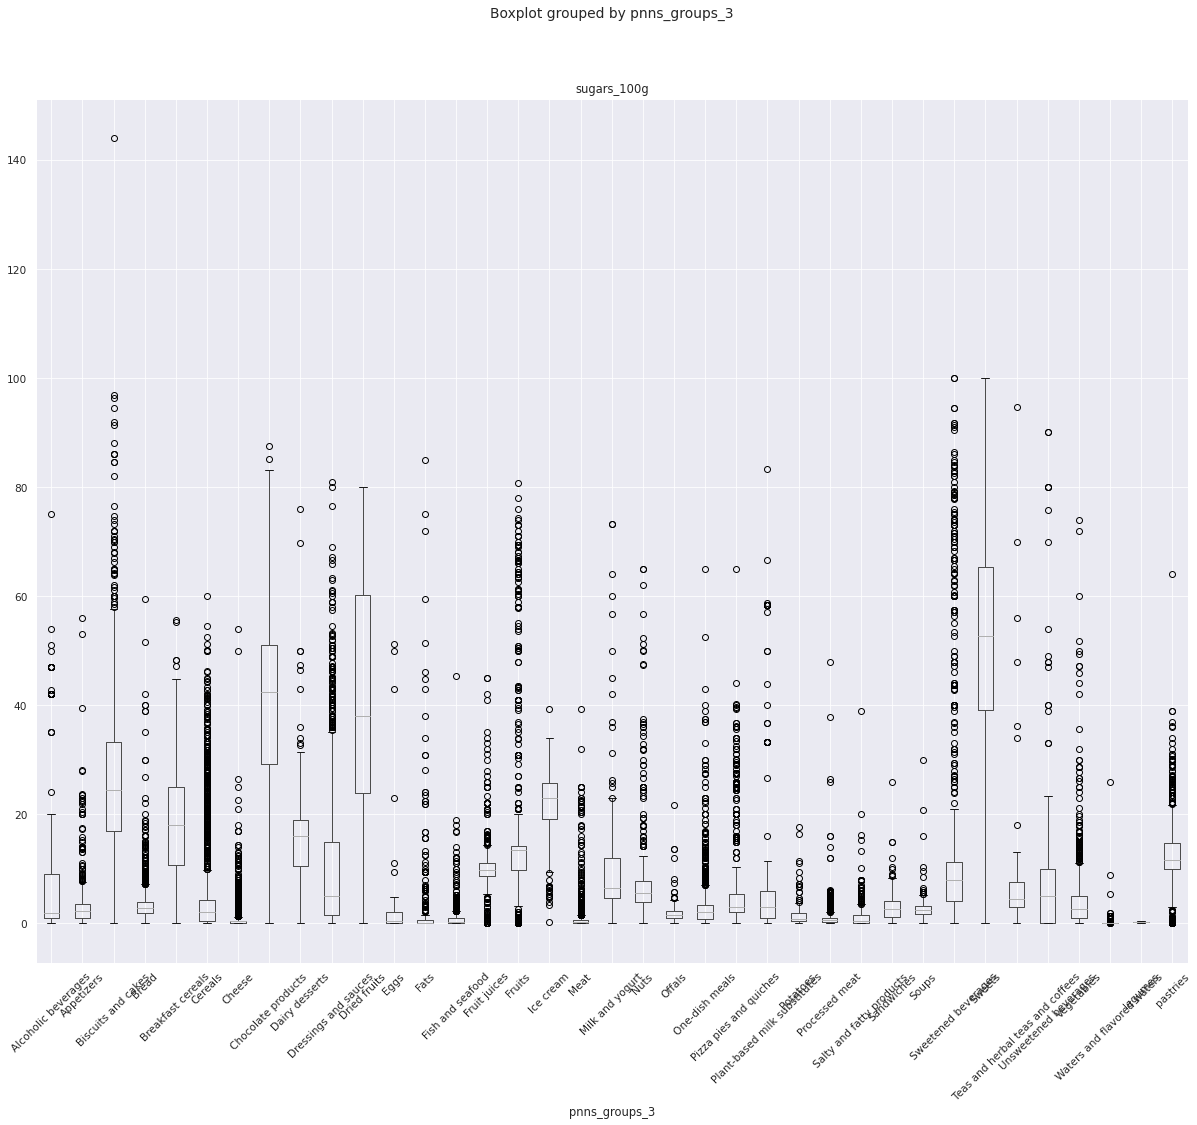

In [22]:
fig, ax = plt.subplots(figsize=(20,16))
plt.suptitle('')
data.boxplot(column=['sugars_100g'], by='pnns_groups_3', ax=ax,rot=45)

<b style="background-color:tomato;font-size:10px;">4.3.3 Acides gras saturés <b>
    <a id="feature_scoring_saturated_fat"></a> 

In [ ]:
fig, ax = plt.subplots(figsize=(20,16))
plt.suptitle('')
data.boxplot(column=['saturated-fat_100g'], by='pnns_groups_3', ax=ax,rot=45)

<b style="background-color:tomato;font-size:10px;">4.3.4 Sel <b>
    <a id="feature_scoring_salt"></a> 

In [ ]:
fig, ax = plt.subplots(figsize=(20,16))
plt.suptitle('')
data.boxplot(column=['salt_100g'], by='pnns_groups_3', ax=ax,rot=45)

<b style="background-color:tomato;font-size:10px;">4.3.5 Fruits, légumes, oléagineux <b>
    <a id="feature_scoring_fruits"></a> 

In [ ]:
fig, ax = plt.subplots(figsize=(20,16))
plt.suptitle('')
data.boxplot(column=['fruits-vegetables-nuts_100g'], by='pnns_groups_3', ax=ax,rot=45)

<b style="background-color:tomato;font-size:10px;">4.3.6 Fibres <b>
    <a id="feature_scoring_fibers"></a> 

In [ ]:
fig, ax = plt.subplots(figsize=(20,16))
plt.suptitle('')
data.boxplot(column=['fiber_100g'], by='pnns_groups_3', ax=ax,rot=45)

<b style="background-color:tomato;font-size:10px;">4.3.7 Protéines <b>
    <a id="feature_scoring_proteins"></a> 

<AxesSubplot:title={'center':'proteins_100g'}, xlabel='pnns_groups_3'>

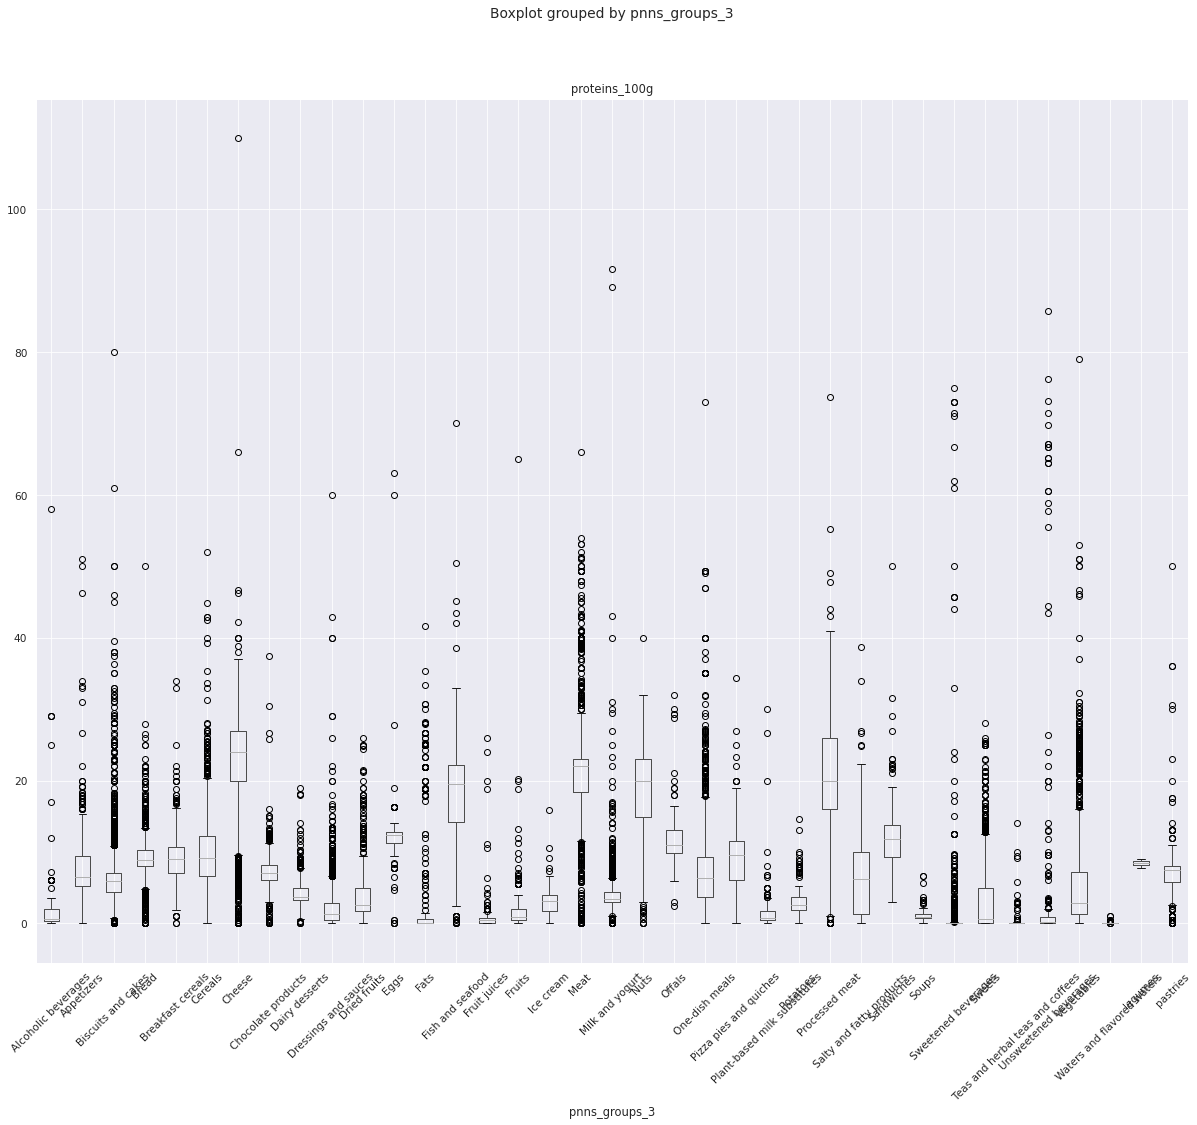

In [23]:
fig, ax = plt.subplots(figsize=(20,16))
plt.suptitle('')
data.boxplot(column=['proteins_100g'], by='pnns_groups_3', ax=ax,rot=45)

<b style="background-color:tomato;font-size:10px;">4.3.8 Synthèse <b>
    <a id="feature_scoring_proteins"></a> 

<b style="background-color:tomato;font-size:14px;">5. ANALYSES MULTIVARIEES<b>
    <a id="multivariate"></a> 

<b style="background-color:tomato;font-size:12px;">5.1 ANALYSE FACTORIELLE<b>
    <a id="desc"></a> 

Au point précédent on a pu mettre en évidence des valeurs de score nutritionnel élevées (mauvais score) et disparates en fonction des principales catégories de produit
Il apparait nécessaire toutefois d'affiner dans l'objectif de permettre à notre application d'offrir une granularité plus fine (ingrédient brut).
Pour cela on va dégager les catégories principales de notre dataset par analyse acp et montrer les mesures de variation qui leur sont liées.

In [26]:
def display_circles(pcs, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None):
    for d1, d2 in axis_ranks: # On affiche les 3 premiers plans factoriels, donc les 6 premières composantes
        if d2 < n_comp:

            # initialisation de la figure
            fig, ax = plt.subplots(figsize=(7,6))

            # détermination des limites du graphique
            if lims is not None :
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 30 :
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else :
                xmin, xmax, ymin, ymax = min(pcs[d1,:]), max(pcs[d1,:]), min(pcs[d2,:]), max(pcs[d2,:])

            # affichage des flèches
            # s'il y a plus de 30 flèches, on n'affiche pas le triangle à leur extrémité
            if pcs.shape[1] < 30 :
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                   pcs[d1,:], pcs[d2,:], 
                   angles='xy', scale_units='xy', scale=1, color="grey")
                # (voir la doc : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.quiver.html)
            else:
                lines = [[[0,0],[x,y]] for x,y in pcs[[d1,d2]].T]
                ax.add_collection(LineCollection(lines, axes=ax, alpha=.1, color='black'))
            
            # affichage des noms des variables  
            if labels is not None:  
                for i,(x, y) in enumerate(pcs[[d1,d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax :
                        plt.text(x, y, labels[i], fontsize='14', ha='center', va='center', rotation=label_rotation, color="blue", alpha=0.5)
            
            # affichage du cercle
            circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
            plt.gca().add_artist(circle)

            # définition des limites du graphique
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)
        
            # affichage des lignes horizontales et verticales
            plt.plot([-1, 1], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Cercle des corrélations (F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)
        
def display_factorial_planes(X_projected, n_comp, pca, axis_ranks, labels=None, limit=10, alpha=1, illustrative_var=None):
    for d1,d2 in axis_ranks:
        if d2 < n_comp:
 
            # initialisation de la figure       
            fig = plt.figure(figsize=(7,6))
        
            # affichage des points
            if illustrative_var is None:
                plt.scatter(X_projected[:, d1], X_projected[:, d2], alpha=alpha)
            else:
                illustrative_var = np.array(illustrative_var)
                for value in np.unique(illustrative_var):
                    selected = np.where(illustrative_var == value)
                    plt.scatter(X_projected[selected, d1], X_projected[selected, d2], alpha=alpha, label=value)
                plt.legend()

            # affichage des labels des points
            if labels is not None:
                for i,(x,y) in enumerate(X_projected[:,[d1,d2]]):
                    plt.text(x, y, labels[i],
                              fontsize='14', ha='center',va='center') 
                    if i == limit:
                        break
                
            # détermination des limites du graphique
            boundary = np.max(np.abs(X_projected[:, [d1,d2]])) * 1.1
            plt.xlim([-boundary,boundary])
            plt.ylim([-boundary,boundary])
        
            # affichage des lignes horizontales et verticales
            plt.plot([-100, 100], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-100, 100], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Projection des aliments (sur F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)

def display_scree_plot(pca):
    scree = pca.explained_variance_ratio_*100
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
    plt.xlabel("rang de l'axe d'inertie")
    plt.ylabel("pourcentage d'inertie")
    plt.title("Eboulis des valeurs propres")
    plt.axhline(y=1, color='blue', linestyle='--',label="Règle de Kaiser")
    plt.legend()
    plt.show(block=False)

def plot_dendrogram(Z, names):
    plt.figure(figsize=(10,25))
    plt.title('Hierarchical Clustering Dendrogram')
    plt.xlabel('distance')
    dendrogram(
        Z,
        labels = names,
        orientation = "left",
    )
    plt.show()


On regroupe les features présentant un intérêt pour effectuer le calcul du score nutritionnel afin d'établir les correlations significatives 

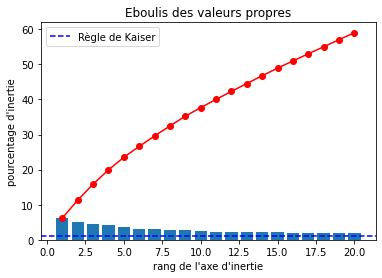

In [27]:
# préparation des données pour l'ACP
list_col=[ 'alcohol_100g',
 #'allergens',
 'beta-carotene_100g',
 'bicarbonate_100g',
 'biotin_100g',
 'caffeine_100g',
 'calcium_100g',
 'carbohydrates_100g',
 'chloride_100g',
 'cholesterol_100g',
 'chromium_100g',
 'copper_100g',
 'energy-kcal_100g',
 'fat_100g',
 'fiber_100g',
 'fluoride_100g',
 'folates_100g',
 'fruits-vegetables-nuts_100g',
 'iodine_100g',
 'iron_100g',
 'magnesium_100g',
 'manganese_100g',
 'molybdenum_100g',
 'nutrition-score-fr_100g',
 'omega-3-fat_100g',
 'omega-6-fat_100g',
 'omega-9-fat_100g',
 'pantothenic-acid_100g',
 'ph_100g',
 'phosphorus_100g',
 #'pnns_groups_3',   
 'potassium_100g',
 #'product_name',   
 'proteins_100g',
 'salt_100g',
 'saturated-fat_100g',
 'selenium_100g',
 'silica_100g',
 'sodium_100g',
 'sugars_100g',
 'taurine_100g',
 'vitamin-a_100g',
 'vitamin-b1_100g',
 'vitamin-b12_100g',
 'vitamin-b2_100g',
 'vitamin-b6_100g',
 'vitamin-b9_100g',
 'vitamin-c_100g',
 'vitamin-d_100g',
 'vitamin-e_100g',
 'vitamin-k_100g',
 'vitamin-pp_100g',
 'zinc_100g']

for col in list_col:
    df_feature_mean = data[col].mean()
    #print(col + ' - mean: ' + str(df_feature_mean))
    data[col].fillna(df_feature_mean,inplace=True)
    #print(data[col].head())


data_pca = data[[
 'alcohol_100g',
 #'allergens',
 'beta-carotene_100g',
 'bicarbonate_100g',
 'biotin_100g',
 'caffeine_100g',
 'calcium_100g',
 'carbohydrates_100g',
 'chloride_100g',
 'cholesterol_100g',
 'chromium_100g',
 'copper_100g',
 'energy-kcal_100g',
 'fat_100g',
 'fiber_100g',
 'fluoride_100g',
 'folates_100g',
 'fruits-vegetables-nuts_100g',
 'iodine_100g',
 'iron_100g',
 'magnesium_100g',
 'manganese_100g',
 'molybdenum_100g',
 'nutrition-score-fr_100g',
 'omega-3-fat_100g',
 'omega-6-fat_100g',
 'omega-9-fat_100g',
 'pantothenic-acid_100g',
 'ph_100g',
 'phosphorus_100g',
 #'pnns_groups_3',   
 'potassium_100g',
 #'product_name',   
 'proteins_100g',
 'salt_100g',
 'saturated-fat_100g',
 'selenium_100g',
 'silica_100g',
 'sodium_100g',
 'sugars_100g',
 'taurine_100g',
 'vitamin-a_100g',
 'vitamin-b1_100g',
 'vitamin-b12_100g',
 'vitamin-b2_100g',
 'vitamin-b6_100g',
 'vitamin-b9_100g',
 'vitamin-c_100g',
 'vitamin-d_100g',
 'vitamin-e_100g',
 'vitamin-k_100g',
 'vitamin-pp_100g',
 'zinc_100g'
    
                ]]



data_pca = data_pca.rename(columns={
                         'alcohol_100g': 'alcool',
                         #'allergens': 'allergènes',
                         'beta-carotene_100g': 'beta-carotene',
                         'bicarbonate_100g': 'bicarbonate',
                         'biotin_100g': 'biotine',
                         'caffeine_100g': 'cafeine',
                         'calcium_100g': 'calcium',
                         'carbohydrates_100g': 'carbohydrates',
                         'chloride_100g': 'chloride',
                         'cholesterol_100g': 'cholesterol',
                         'chromium_100g': 'chrome',
                         'copper_100g': 'cuivre',
                         'energy-kcal_100g': 'energie-kcal',
                         'fat_100g': 'Matieres-grasses',
                         'fiber_100g': 'fibres',
                         'fluoride_100g': 'fluoride',
                         'folates_100g': 'vit-B9',
                         'fruits-vegetables-nuts_100g': 'fruits-legumes-noix',
                         'iodine_100g': 'iodine',
                         'iron_100g': 'fer',
                         'magnesium_100g': 'magnesium',
                         'manganese_100g': 'manganese',
                         'molybdenum_100g': 'molybdene',
                         'nutrition-score-fr_100g': 'nutrition-score-fr',
                         'omega-3-fat_100g': 'omega-3',
                         'omega-6-fat_100g': 'omega-6',
                         'omega-9-fat_100g': 'omega-9',
                         'pantothenic-acid_100g': 'Vit-B5',
                         'ph_100g': 'ph',
                         'phosphorus_100g': 'phosphore',
                         #'pnns_groups_3':'categorie', 
                          'potassium_100g': 'potassium', 
                          #'product_name':'produit',
                         'proteins_100g': 'proteines',
                         'salt_100g': 'sel',
                         'saturated-fat_100g': 'Graisses-saturees',
                         'selenium_100g': 'selenium',
                         'silica_100g': 'silice',
                         'sodium_100g': 'sodium',
                         'sugars_100g': 'sucres',
                         'taurine_100g': 'taurine',
                         'vitamin-a_100g': 'vit-A',
                         'vitamin-b1_100g': 'vit-B1',
                         'vitamin-b12_100g': 'vit-B12',
                         'vitamin-b2_100g': 'vit-B2',
                         'vitamin-b6_100g': 'vit-B6',
                         'vitamin-b9_100g': 'vit-B9',
                         'vitamin-c_100g': 'vit-C',
                         'vitamin-d_100g': 'vit-D',
                         'vitamin-e_100g': 'vit-E',
                         'vitamin-k_100g': 'vit-K',
                         'vitamin-pp_100g': 'vit-PP',
                         'zinc_100g': 'zinc'    
                        })



# choix du nombre de composantes à calculer
n_comp = 20

X = data_pca.values
names = data_pca.index
#names = data['product_name']

features = data_pca.columns

# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

# Calcul des composantes principales
pca = decomposition.PCA(n_components=n_comp)
pca.fit(X_scaled)

# Eboulis des valeurs propres
display_scree_plot(pca)



Aanlyse de l'éboulis : 
Expliquer pourquoi 20
toutes les valeurs sont > 1 (règle de Kaiser : La règle de Kaiser repose sur une idée simple. Dans une ACP normée, la somme des valeurs propres étant égale au nombre de variables, leur moyenne vaut 1. Nous considérons par conséquent qu'un axe est intéressant si sa valeur propre est supérieure 1)
Une inflexion au 2ème rang d'axe mais qui n'expliquerait moins de 40% de la variabilité
On note un aplanissement de la courbe au 10ème rang d'axe, pour 95% de variabilité totale expliquée.
Nous pouvons arrêter à 10 le nombre de composantes principales pour notre 
 

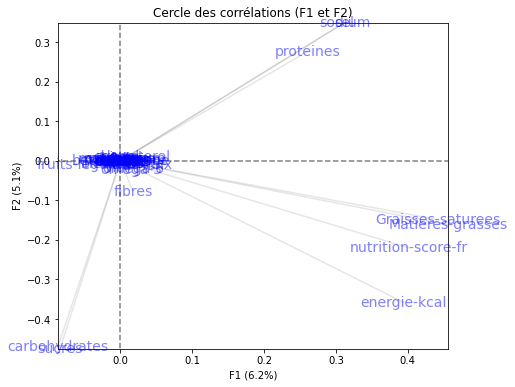

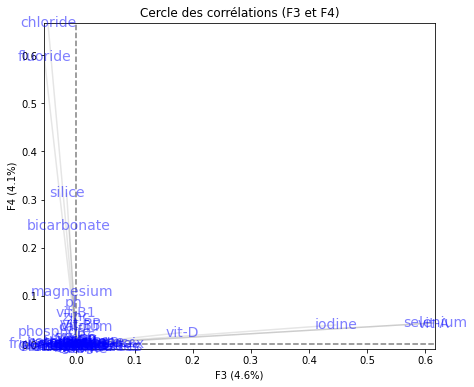

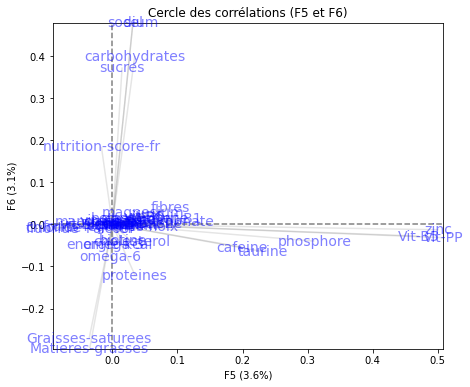

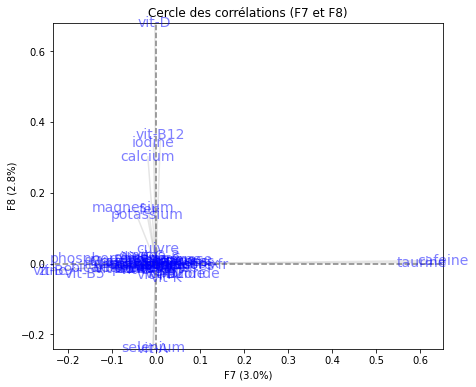

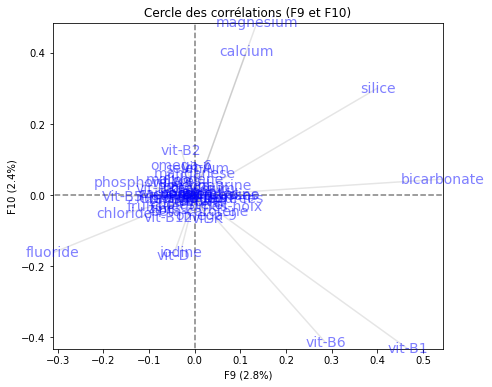

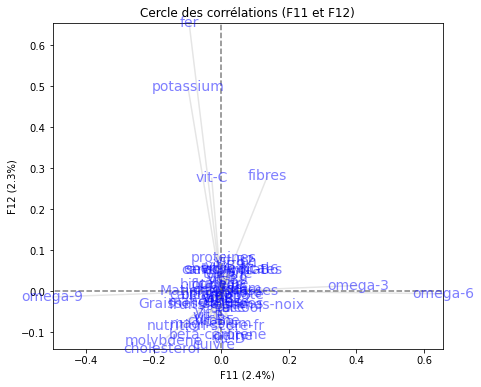

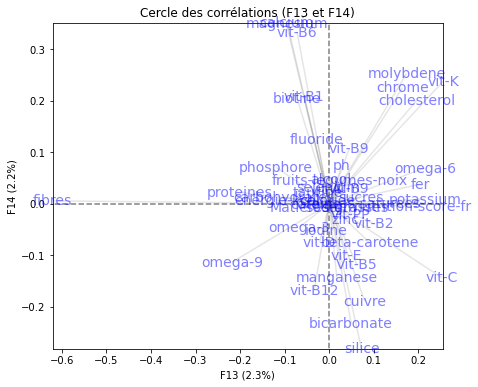

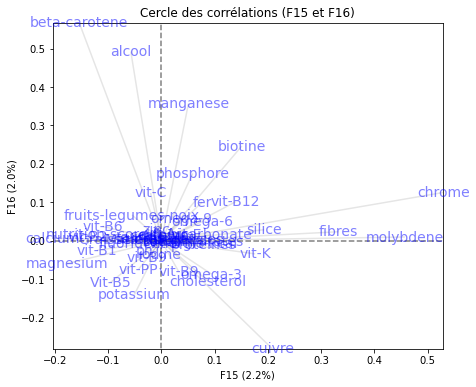

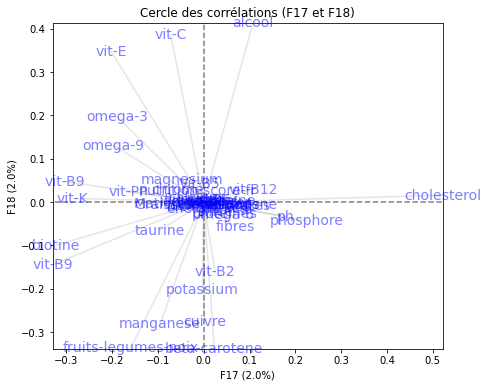

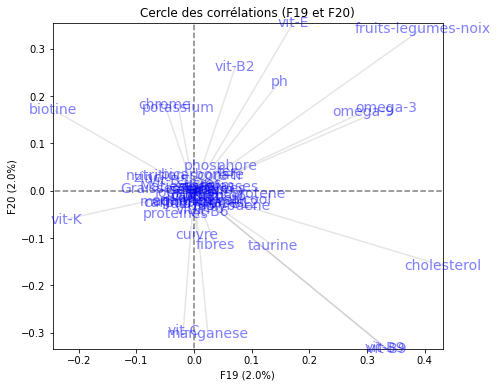

In [29]:
# Cercle des corrélations
pcs = pca.components_

display_circles(pcs, n_comp, pca, [(0,1),(2,3),(4,5),(6,7),(8,9),(10,11),(12,13),(14,15),(16,17),(18,19),(20,21),(22,23),(24,25)], labels = np.array(features))
#display_circles(pcs, n_comp, pca, [(0,1)], labels = np.array(features))

plt.show()

In [ ]:
Commentaires
ex : https://www.kaggle.com/dmitryleshchinskiy/food-facts-pca-k-means-anova#Correlation-circle-of--PC3-and-PC4

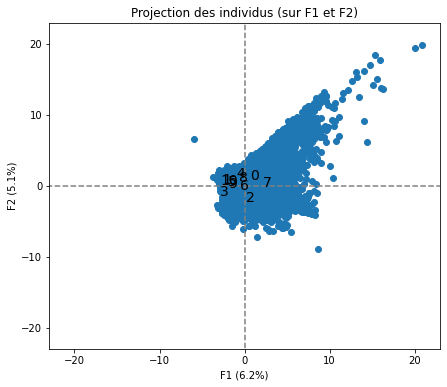

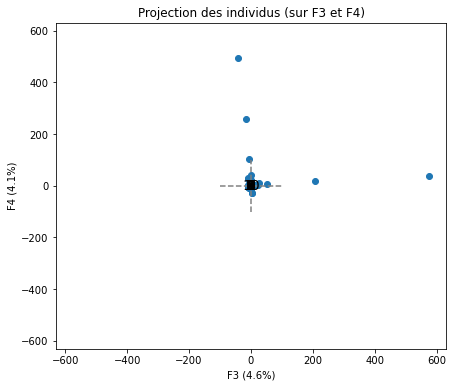

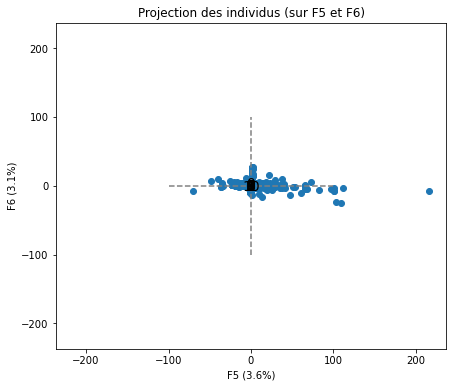

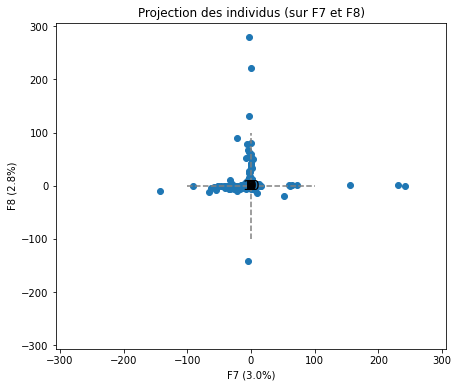

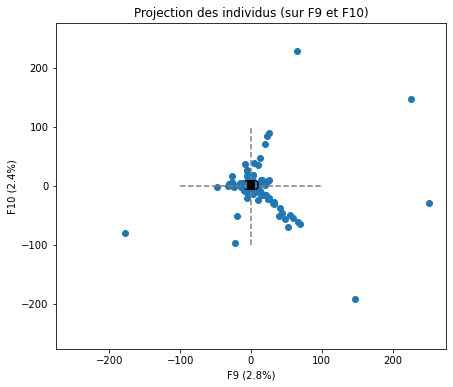

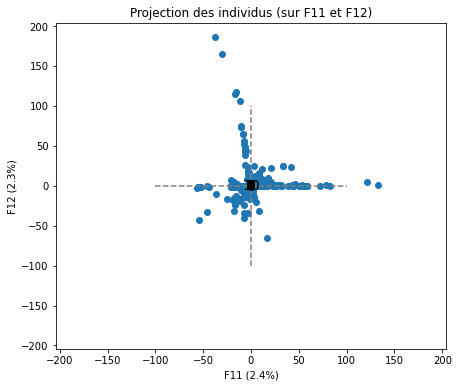

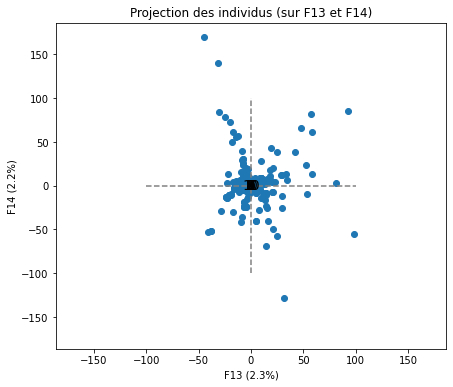

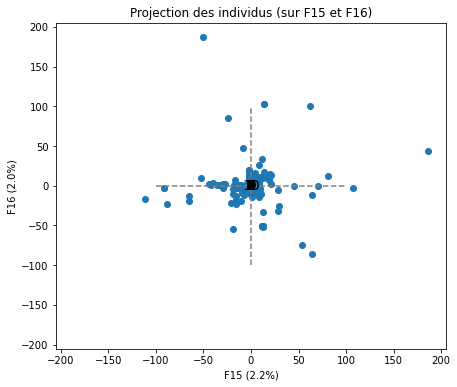

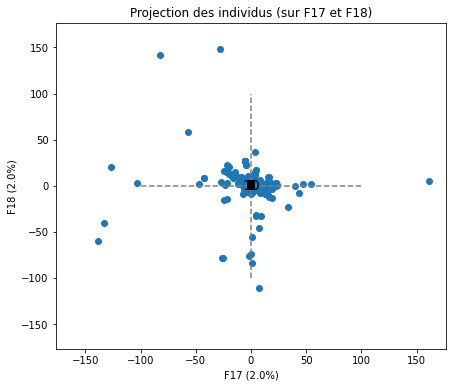

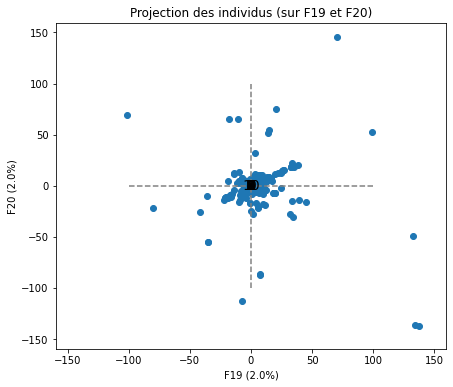

In [32]:
# Projection des individus
X_projected = pca.transform(X_scaled)
display_factorial_planes(X_projected, n_comp, pca, [(0,1),(2,3),(4,5),(6,7),(8,9),(10,11),(12,13),(14,15),(16,17),(18,19),(20,21),(22,23),(24,25)], labels = np.array(names))

plt.show()

In [ ]:
commentaires

<b style="background-color:tomato;font-size:14px;">5.2 ANALYSE EXPLICATIVE<b>
    <a id="expl"></a> 

On propose de faire une analyse de dépendance bivariée entre le caractère bio des produits (variable qualitative) et le nutriscore (variable quantitative).
Pour cela on crée un indicateur bio qui est déterminé à partir de la feature labels_tags. 
Cette feature mentionne si le produit est "bio" ou "organic".
L'indicateur qualitatif résultant aura deux valeurs :
0 : n'est pas bio
1 : est bio
On mènera alors une ANOVA pour déterminer le degré de dépendance de la variable quantitative "nutriscore" au facteur qualitatif "bio".
Dans ce cas d'étude la variable dépendante est le nutriscore, et la variable indépendante est l'indicateur bio.
On va mesurer si la moyenne du nutriscore est homogène sur les modalités du facteur bio.
On espère démontrer la dépendance de ces deux variables en montrant que l'hypothèse nulle (ie H0 est l'hypothèse que les variables sont indépendantes) d'égalité des moyennes peut être rejetée. On effectuera pour cela un test de Fischer (calcul de la F-value) qui permet de comparer la variance inter-échantillon à la variance intra-échantillon.


In [121]:
#à supprimer
data[[
  'packaging_tags'
 ,'labels_tags'   
 ,'brands_tags'
 ,'ingredients_text'
 ,'additives_tags'
 ,'ingredients_from_palm_oil_tags'
 ,'nutriscore_score'
 ,'nutriscore_grade'
 ,'pnns_groups_3'
 ,'brand_owner'
 ,'main_category'
 ]].head()

,packaging_tags,labels_tags,brands_tags,ingredients_text,additives_tags,ingredients_from_palm_oil_tags,nutriscore_score,nutriscore_grade,pnns_groups_3,brand_owner,main_category
0,NaN,fr:delois-france,courte-paille,eau graines de téguments de moutarde vinaigre ...,NaN,NaN,18.0,d,Dressings and sauces,NaN,en:mustards
1,NaN,NaN,NaN,NaN,NaN,NaN,1.0,b,One-dish meals,NaN,en:seasoned-shredded-carrots
2,"barquette,plastique",NaN,"crous-resto,crous",NaN,NaN,NaN,14.0,d,Biscuits and cakes,NaN,en:coconut-pies
3,NaN,NaN,crous,NaN,NaN,NaN,-2.0,a,Fruits,NaN,en:pear-compotes
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Meat,NaN,fr:aiguillettes-de-poulet


In [122]:
import math
def bio_indicator(row):
    
    v = row['labels_tags']
    new_val=0
    if ("organic" in v or "bio" in v):
        new_val=1
        
    return new_val    


In [123]:
#Contruction du subset d'analyse
subset = data[data.labels_tags.notnull()]
subset = subset[subset.nutriscore_score.notnull()]
subset['bio'] = subset.apply (lambda row: bio_indicator(row), axis=1)
subset[['brands_tags','labels_tags','nutriscore_score','bio','product_name','pnns_groups_3']].head()

,brands_tags,labels_tags,nutriscore_score,bio,product_name,pnns_groups_3
0,courte-paille,fr:delois-france,18.0,0,moutarde au moût de raisin,Dressings and sauces
21,NaN,en:palm-oil-free,2.0,0,Pâte a tartiner,Sweets
26,comme-j-aime,"fr:viande-francaise,en:made-in-france",0.0,0,Blanquette de Volaille et son Riz,One-dish meals
31,comme-j-aime,en:green-dot,2.0,0,Entremets Crème Brulée,Dairy desserts
36,kazidomi,"en:organic,en:eu-organic,en:eu-non-eu-agricult...",7.0,1,Pommes séchées,Dried fruits


k = nb of conditions: 2
N = nb total of participants: 59975
n = nb of participants in each condition: 46219
DFbetween: 1
DFwithin: 59973
DFtotal: 59974


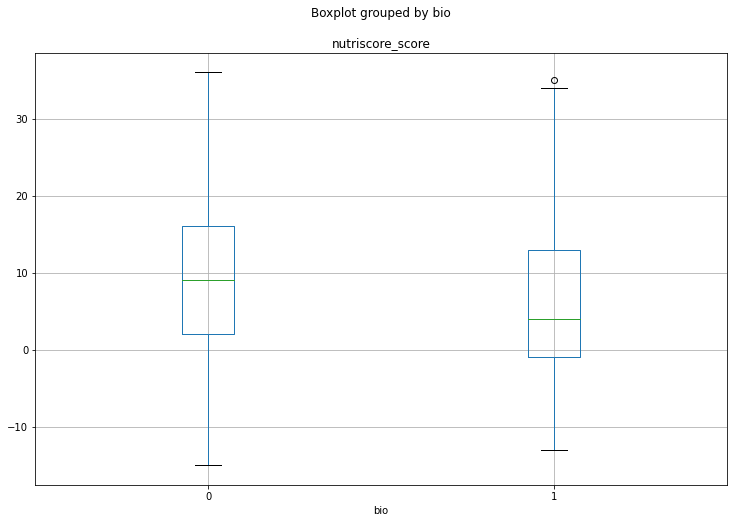

In [143]:
#Create a boxplot
subset.boxplot('nutriscore_score', by='bio', figsize=(12, 8))

ctrl = subset['nutriscore_score'][subset.bio == 'ctrl']

grps = pd.unique(subset.bio.values)
d_data = {grp:subset['nutriscore_score'][subset.bio == grp] 
    for grp in pd.unique(subset.bio.values)}

k = len(pd.unique(subset.bio))  # number of conditions
N = len(subset.values)  # nb total of participants
n = subset.groupby('bio').size()[0] #nb of Participants in each condition
#Degree of freedom (DF)
DFbetween = k - 1
DFwithin = N - k
DFtotal = N - 1

print('k = nb of conditions: ' + str(k))
print('N = nb total of participants: ' + str(N))
print('n = nb of participants in each condition: ' + str(n))

print('DFbetween: ' + str(DFbetween))
print('DFwithin: ' + str(DFwithin))
print('DFtotal: ' + str(DFtotal))


In [125]:
#Sum of Squares Between is the variability due to interaction between the groups
SSbetween = (sum(subset.groupby('bio').sum()['nutriscore_score']**2)/n) - (subset['nutriscore_score'].sum()**2)/N
SSbetween

-278472.49447040074

In [126]:
#Sum of Squares Within - The variability in the data due to differences within people
sum_y_squared = sum([value**2 for value in subset['nutriscore_score'].values])
SSwithin = sum_y_squared - sum(subset.groupby('bio').sum()['nutriscore_score']**2)/n
SSwithin

5049146.221856812

In [127]:
#Sum of Squares Total will be needed to calculate eta-squared later. This is the total variability in the data
SStotal = sum_y_squared - (subset['nutriscore_score'].sum()**2)/N
SStotal

4770673.727386411

In [128]:
#Mean square between is the sum of squares within divided by degree of freedom between
MSbetween = SSbetween/DFbetween
MSbetween

-278472.49447040074

In [129]:
#Mean Square within 
MSwithin = SSwithin/DFwithin
MSwithin

84.19032267615114

In [130]:
#F-value
F = MSbetween/MSwithin
F

-3307.6544384035783

In [131]:
#To reject the null hypothesis we check if the obtained F-value is above the critical value for rejecting the null hypothesis.
from scipy import stats
p = stats.f.sf(F, DFbetween, DFwithin)
p

1.0

In [132]:
#calculate effect size. We start with the commonly used eta-squared
eta_sqrd = SSbetween/SStotal
eta_sqrd

-0.05837173329875997

In [133]:
#eta-squared is somewhat biased because it is based purely on sums of squares from the sample. 
#No adjustment is made for the fact that what we are aiming to do is to estimate the effect size in the population. 
#Thus, we can use the less biased effect size measure Omega squared
om_sqrd = (SSbetween - (DFbetween * MSwithin))/(SStotal + MSwithin)
om_sqrd

-0.05838835036233394

Test de chi-2
#https://www.kaggle.com/franoisboyer/fropenfoodfacts-2020-scoring-features-exploration#Analyse-multivari%C3%A9e-:-Corr%C3%A9lation-entre-les-donn%C3%A9es
#https://www.deschamps.io/236-realiser-un-test-dindependance-chi2-en-python-avec-scipy-stats

In [135]:
chi2_data = subset[['bio','nutriscore_score']]
chi2_data.head()

,bio,nutriscore_score
0,0,18.0
21,0,2.0
26,0,0.0
31,0,2.0
36,1,7.0


In [141]:
X = "nutriscore_score"
Y = "bio"
cont = chi2_data[[X, Y]].pivot_table(index=X, columns=Y, aggfunc=len).fillna(0).copy().astype(int)
cont

bio,0,1
nutriscore_score,,
-15.0,2,0
-14.0,8,0
-13.0,10,9
-12.0,22,10
-11.0,46,16
-10.0,62,21
-9.0,78,33
-8.0,147,73
-7.0,204,112


In [142]:
import scipy.stats as st
st_chi2, st_p, st_dof, st_exp = st.chi2_contingency(cont)
print(str(st_chi2),str(st_p),str(st_dof),str(st_exp))

2122.904477248288 0.0 50 [[1.54127553e+00 4.58724469e-01]
 [6.16510213e+00 1.83489787e+00]
 [1.46421175e+01 4.35788245e+00]
 [2.46604085e+01 7.33959150e+00]
 [4.77795415e+01 1.42204585e+01]
 [6.39629346e+01 1.90370654e+01]
 [8.55407920e+01 2.54592080e+01]
 [1.69540308e+02 5.04596915e+01]
 [2.43521534e+02 7.24784660e+01]
 [7.29793964e+02 2.17206036e+02]
 [8.27664960e+02 2.46335040e+02]
 [1.54512872e+03 4.59871280e+02]
 [1.31701994e+03 3.91980058e+02]
 [1.24380935e+03 3.70190646e+02]
 [1.93661271e+03 5.76387295e+02]
 [2.36739922e+03 7.04600784e+02]
 [2.23022569e+03 6.63774306e+02]
 [2.29881246e+03 6.84187545e+02]
 [2.43752725e+03 7.25472747e+02]
 [2.06993304e+03 6.16066961e+02]
 [1.63375206e+03 4.86247937e+02]
 [9.60985294e+02 2.86014706e+02]
 [8.00692639e+02 2.38307361e+02]
 [6.62748479e+02 1.97251521e+02]
 [8.13022843e+02 2.41977157e+02]
 [9.63297207e+02 2.86702793e+02]
 [2.00442883e+03 5.96571171e+02]
 [1.70773329e+03 5.08266711e+02]
 [1.95433737e+03 5.81662626e+02]
 [2.06993304e+03 6

<b style="background-color:tomato;font-size:14px;">6 APPLICATION<b>
    <a id="application"></a> 

In [5]:
def spider(values, cat, ax):
    from math import pi
    N = len(cat)
    x_as = [n / float(N) * 2 * pi for n in range(N)]
    # for circularity
    values += values[:1]
    x_as += x_as[:1]
    # Set color of axes
    plt.rc('axes', linewidth=0.5, edgecolor="#888888")
    # Set clockwise rotation. That is:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)
    # Set position of y-labels
    ax.set_rlabel_position(0)
    # Set color and linestyle of grid
    ax.xaxis.grid(True, color="#888888", linestyle='solid', linewidth=0.5)
    ax.yaxis.grid(True, color="#888888", linestyle='solid', linewidth=0.5)
    # Set ticks values and labels    
    ax.set_xticks(x_as[:-1])
    ax.set_xticklabels([])
    ax.set_yticks([0.1, 0.5, 1, 2, 10])
    ax.set_yticklabels(["0.1", "0.5", "1", "2", "10"])
    # Plot data
    ax.plot(x_as, values, linewidth=0, linestyle='solid', zorder=3)
    # Fill area
    ax.fill(x_as, values, 'b', alpha=0.3)
    # Set axes limits
    ax.set_ylim(0, 3)
    # Draw ytick labels to make sure they fit properly
    for i in range(N):
        angle_rad = i / float(N) * 2 * pi
        if angle_rad == 0:
            ha, distance_ax = "center", 3
        elif 0 < angle_rad < pi:
            ha, distance_ax = "left", 3
        elif angle_rad == pi:
            ha, distance_ax = "center", 3
        else:
            ha, distance_ax = "right", 3

        ax.text(angle_rad, 0.2+distance_ax, cat[i], size=10,
                horizontalalignment=ha, verticalalignment="center")

In [46]:
def showMenuProjection(dishes):
    fig, axes = plt.subplots(nrows=3, ncols=3, subplot_kw=dict(projection='polar'), figsize=(11,11))
    axes = np.array(axes)

    liste_columns = ['saturated-fat_100g','proteins_100g','salt_100g','fruits-vegetables-nuts_100g','energy-kcal_100g','sugars_100g','fiber_100g']
    list_nutriments = [s.strip('_100g') for s in liste_columns]

    df_chart = data[pd.notnull(data[liste_columns]).all(axis = 1)]
    mean_values = list(df_chart[liste_columns].mean().values)

    ind = 0
    for ax in axes.reshape(-1):
        dish = df_chart.loc[df_chart['product_name'].str.lower() == dishes[ind]]
        absolute_values = list(dish.iloc[0][liste_columns].T.values)        
        values  = [ val/mean_values[i] for i, val in enumerate(absolute_values)]
        spider(values, list_nutriments, ax)
        ax.set_title(dish.iloc[0].product_name+'\n', fontsize = 12)
        
        ind += 1
        if ind > (len(dishes)-1):
            break
        
    fig.subplots_adjust(hspace=0.5,wspace=1)
    plt.show()

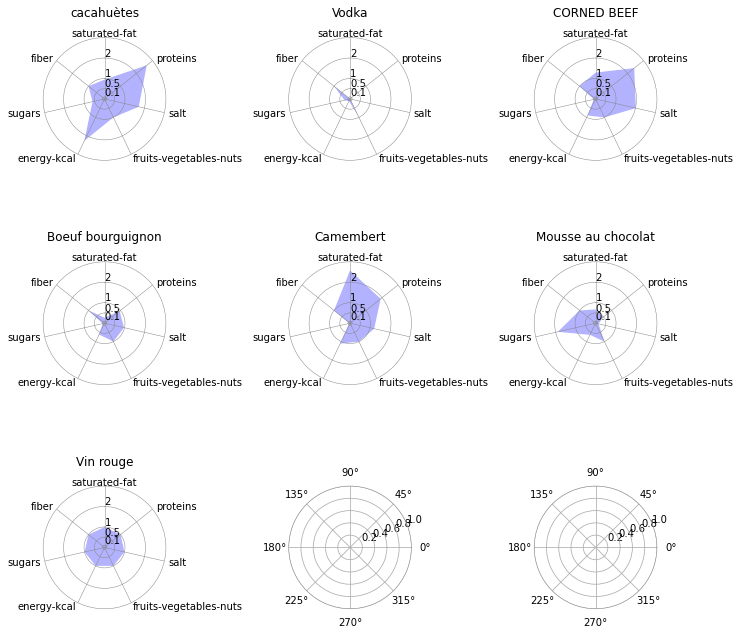

In [45]:
"""
4 - aiguillette de poulet
8 - cuisse de poulet
12 - corned beef
16 - miel de printemps
20 - mélange de fruits secs
24 - miel corse bio
28 - salade cesar
32 - riz au lait
36 - pommes séchées
"""

dishes=['cacahuètes','vodka','corned beef','boeuf bourguignon','camembert','mousse au chocolat','vin rouge']

showMenuProjection(dishes)

#4 - nom du produit
#liste_columns = ['saturated-fat_100g','proteins_100g','salt_100g','fruits-vegetables-nuts_100g','energy-kcal_100g','sugars_100g','fiber_100g']
#df_chart = data[pd.notnull(data[liste_columns]).all(axis = 1)]
#df_chart.head()
#dish = df_chart.loc[df_chart['product_name'].str.lower() ==('corned beef')]
#dish

#df_chart = data[pd.notnull(data[liste_columns]).all(axis = 1)]
#df_chart.iloc[4][liste_columns].T.values


In [10]:
del data